# Entrega 2 - Aprendizaje Bayesiano

### Grupo 9:
     - J. Gu       C.I 5.509.557-9
     - M. Nuñez    C.I 5.225.262-3
     - L. Pereira  C.I 5.268.309-4
     





## 1. Objetivo

El objetivo de este informe es implementar y evaluar un modelo basado en aprendizaje bayesiano, y capaz de soportar problemas causados por probabilidades condicionales iguales a cero incorporando un parámetro m, el cual indica el tamaño equivalente de muestra y el cual se utilizará para generar un m-estimador de las probabilidades condicionales. 

Se evaluará las herramientas de metodologías vistas en el curso, evaluando sobre cuales son las más adecuadas en este caso y, en particular, se aplicarán técnicas de feature selection, cross validation, se presentará la matriz de confusión y la curva de precision-recall para todos los casos.


## 2. Diseño

En esta sección se presentaran las evaluaciones de las herramientas de metodologías vistas en el curso aplicadas a este problema, una descripción del procesamiento de datos realizado y los métodos de evaluación utilizados.


### 2.1 Herramientas de metodología

A la hora de trabajar con conjuntos de datos y modelos de clasificación, siempre, sin importar el modelo, es necesario utilizar metodologías que nos aseguren un buen preprocesamiento de los datos, cómo dividir el conjunto de datos para entrenarlo y evaluarlo, qué métricas utilizar a la hora de evaluar el modelo, entre varias otras. En esta sección analizaremos las metodologías vistas en el curso y discutiremos sí sería necesario aplicarlos, o no, y por qué.

#### 2.1.1 Preprocesamiento
Lo primero que debemos tener en cuenta al trabajar con conjuntos de datos, es que estos datos probablemente vienen de distintas fuentes, en distintos formatos, y muchas veces varios de los atributos que contienen pueden no ser necesarios al pasarlos por el modelo de clasificación. Por esta razón a veces se debe agrupar, eliminar o alterar el estado de algunos de los datos para transformar nuestro conjunto de datos en uno que se pueda utilizar sin problemas en modelos de clasificación. 
Al utilizar un conjunto de datos suele suceder que:
    - El conjunto cuenta con atributos faltantes. Instancias con atributos sin asignación de valor.
    - El conjunto cuenta con atributos categóricos representados como Strings (o algún tipo de datos no numérico), lo cual complica el entrenamiento de los modelos luego ya que la mayoría se manejan con atributos numéricos.
    - El conjunto cuenta con datos numéricos en distintas escalas, lo cual puede dificultar a algunos modelos.

Estos son algunos problemas generales que pueden surgir al trabajar con conjuntos de datos. Para nuestro caso particular, al trabajar con el conjunto «AIDS Clinical Trials Group Study 175», pudimos ver que éste no contaba con atributos faltantes, todos los atributos tenían algún valor asignado para todas las instancias y tampoco tenía atributos categóricos que no estuvieran representados como númericos. 
Por otro lado, los datos numéricos sí están en distintas escalas, ya que representan distintas características (peso, altura, edad, etc.). Por esta razón es que sería válido, al trabajar con este conjunto de datos en particular, utilizar algún preprocesamiento que normalice los datos, así todos se trabajan en las mismas escalas.

Sin embargo, para el modelo que estamos utilizando en este estudio, precisamos que todos los datos sean categóricos. Por lo tanto, es innecesario normalizar los valores numéricos ya que luego igualmente los estaremos categorizando con un método de discretización.

#### 2.1.1 División del conjunto
Tras haber preprocesado los datos y tenerlos en un formato que sirva para el modelo que estamos utilizando, debemos elegir cómo vamos a dividir nuestro conjunto de datos para utilizar una sección de entrenamiento y otra de evaluación. Ante esto hay dos enfoques:
    - Por un lado podemos dividir, de manera azarosa, nuestro conjunto de datos en un 80%-20% o 70%-30% para entrenamiento y evaluación respectivamente, y utilizar esas divisiones para hacer eso.
    - Por otro lado, podemos utilizar validación cruzada. En este caso se divide el conjunto de datos en 5, y se realizan 5 recorridas distintas, en cada una se utiliza una partición distinta para evaluación y las restantes 4 para entrenamiento. Tras hacer las 5 recorridas se promedia los valores obtenidos del rendimiento del modelo y esos son los que se utilizan para el análisis posterior.

Para este caso particular vamos a utilizar validación cruzada. Entendemos que esta forma de trabajar con el conjunto tiene varias ventajas. Como primera, permite utilizar todo el conjunto de datos para el entrenamiento y la evaluación, lo cual es beneficioso cuando se trabaja con conjuntos de datos que no son extremadamente grandes. A su vez, también ayuda a mitigar el riesgo de sobreajuste al proporcionar una evaluación más completa del rendimiento del modelo en diferentes particiones del conjunto de datos.

A su vez, otro factor que debemos decidir en estos momentos, es si utilizaremos selección de atributos. Esta es una técnica que se utiliza para analizar si todos los atributos que componen al conjunto tienen el mismo peso en los modelos, y en caso de que se descubra que alguno no tiene ningún efecto, o su efecto no impacta mucho, se pueden remover del conjunto para mejorar la eficiencia e incluso los resultados.
Ante esto, decidimos aplicar pruebas de Chi-Cuadrado comparando cada atributo con la etiqueta, y viendo cuales atributos están relacionados con la etiqueta de alguna forma y cuales es mas probable que fueran casualidad las relaciones que mantienen.

#### 2.1.1 Evaluación

A la hora de evaluar precisamos definir que métricas vamos a utilizar para visualizar el desempeño de nuestro modelo. Para esto hay varias métricas disponibles que nos brindan distinta información, entre estas se encuentran:
    - Acierto: El acierto identifica cuántas instancias se clasificaron correctamente, ya sea de la clase positiva o la negativa.
    - Precisión: La precisión indica cuántas instancias que se clasificaron de como de la clase positiva, de verdad eran de esa clase.
    - Recall: El recall indica cuántas de las instancias positivas, se clasificaron efectivamente como positivas.
    - Medida-F: Es una medida que intenta combinar los valores de precisión y recall en un solo valor, para medir el desempeño en base a ese.

Para este laboratorio vemos como coherente utilizar los valores de acierto, precisión y recall. También se podría utilizar la medida-f para visualizar un único valor en base a lo obtenido del recall y la precisión, pero para este trabajo no lo estaremos utilizando.
Además, para acompañar a estas métricas, utilizaremos matrices de confusión para ver de forma mas visual los resultados obtenidos de cada clase (falsos positivos, falsos negativos, verdaderos positivos y verdaderos negativos) y también graficaremos las curvas de precisión-recall para visualizar como se desempeña nuestro algoritmo a medida que se va variando un determinado valor de límite. Esto último cabe destacar que lo podemos utilizar en este caso ya que nuestro modelo bayesiano permite calcular el porcentaje de confiabilidad con el cual se tiene certeza del etiquetado que se está realizando. Si estuvieramos trabajando con otro tipo de modelos que no permite obtener estos valores, como lo es árboles de decisión, estas curvas no podrían trazarse. 

### 2.2 Preprocesamiento de datos

Para nuestro laboratorio, comenzamos obteniendo el conjunto de datos y realizando una limpieza inicial. La primera acción fue eliminar la columna 0, que correspondía al identificador del paciente. Esta columna no aportaba información relevante para la predicción, ya que es simplemente un identificador único y no tiene correlación con las características de salud que queremos evaluar.

A continuación, aplicamos la discretización a los atributos continuos utilizando la clase KBinsDiscretizer de la biblioteca sklearn, la cual discretiza los valores en un número fijo de bins. Esto es importante ya que el algoritmo Naive Bayes, en su forma básica, opera sobre datos categóricos, por lo que es necesario convertir los valores continuos en categorías discretas. Para este caso, elegimos discretizar en dos bins utilizando la estrategia de distribución uniforme, lo que permite dividir los valores en dos intervalos con igual amplitud.

In [2]:
#Importaciones
import numpy as np
import pandas as pd
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import KBinsDiscretizer

In [3]:
# Cargar el dataset con encabezados
DATASET_FILE = 'lab1_dataset.csv'
dataset = pd.read_csv(DATASET_FILE, sep=",")

# Guardar los nombres de las columnas
column_names = dataset.columns[1:]  # Excluir la primera columna (ID del paciente)

# Eliminar la primera columna (ID del paciente)
dataset = dataset.drop(dataset.columns[0], axis=1)

# Definir las columnas categóricas manualmente
columnas_categoricas = [1, 4, 5, 6, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18]

# Extraer los atributos y la etiqueta
atributos = dataset.iloc[:, 1:].values  # Todas las columnas menos la primera (la etiqueta)
etiqueta = dataset.iloc[:, 0].values    # Primera columna como etiqueta

#### Aplicamos la discretización de los atributos continuos:



In [5]:
# Crear un KBinsDiscretizer para discretizar los valores continuos
discretizer = KBinsDiscretizer(n_bins=2, encode='ordinal', strategy='uniform')

# Aplicar la discretización solo a las columnas continuas
for col in range(atributos.shape[1]):
    if col not in columnas_categoricas:
        # Discretizar la columna continua
        atributos[:, col:col+1] = discretizer.fit_transform(atributos[:, col:col+1])

# Convertir `etiqueta` a una forma de columna para la concatenación
etiqueta_columna = etiqueta.reshape(-1, 1)

# Conatenar `etiqueta` con los atributos discretizados
dataset_discretizado = np.hstack([etiqueta_columna, atributos])

# Ajustar los nombres de las columnas
column_names_discretizado = ['etiqueta'] + list(column_names[1:])

# Convertir el array discretizado en un DataFrame
dataset_discretizado_df = pd.DataFrame(dataset_discretizado, columns=column_names_discretizado)


  #### 2.1.2 Selección de atributos

  Una vez discretizados los atributos, aplicamos la prueba de chi-cuadrado (chi2) sobre los atributos categóricos. Esta técnica nos permitió identificar qué columnas tenían una relación estadísticamente significativa con la variable objetivo (la etiqueta de clasificación). Las columnas cuyos p-valores resultaron mayores a 0.05 fueron consideradas irrelevantes para la predicción y, por tanto, candidatas a ser eliminadas. Esta técnica de selección de características es crucial para reducir la dimensionalidad del modelo y evitar el sobreajuste.
    
  Finalmente, con el conjunto de datos discretizado y los atributos irrelevantes eliminados, el dataset quedó preparado para la fase de entrenamiento y validación cruzada del modelo Naive Bayes. Este paso garantiza que el modelo será evaluado con un conjunto de características relevantes, maximizando su capacidad predictiva sin añadir ruido innecesario.
    
  Este preprocesamiento sienta las bases para la aplicación del modelo Naive Bayes con el hiperparámetro m, y la posterior evaluación mediante validación cruzada, matriz de confusión y la curva de precision-recall. mejores puntos de corte durante su ejecución. 

In [6]:
# Definir la variable objetivo
y = dataset['cid'] 

# Definir manualmente las columnas categóricas
columnas_categoricas = ['time','trt','age','wtkg', 'hemo', 'homo', 'drugs','karnof', 'oprior', 'z30', 'zprior','preanti','race', 'gender', 'str2', 'strat', 'symptom', 'treat', 'offtrt','cd40','cd420','cd80','cd820']

# Seleccionar las columnas categóricas que ya son numéricas
X_categoricas_encoded = dataset_discretizado_df[columnas_categoricas]

# Aplicar la prueba de Chi-cuadrado
chi_scores, p_values = chi2(X_categoricas_encoded, y)

# Mostrar los resultados del Chi-cuadrado para las columnas categóricas
print("\nPrueba de Chi-cuadrado para columnas categóricas:")
for i, col in enumerate(columnas_categoricas):
    print(f"Columna: {col}, Chi-cuadrado: {chi_scores[i]}, p-valor: {p_values[i]}")

print("\n Tras las Pruebas Chi-cuadrado, las columnas a eliminar son:")
for i, col in enumerate(columnas_categoricas):
    if p_values[i] > 0.05:
        print(f"Columna a borrar: {col}")


Prueba de Chi-cuadrado para columnas categóricas:
Columna: time, Chi-cuadrado: 91.75135476517072, p-valor: 9.828096759426078e-22
Columna: trt, Chi-cuadrado: 12.727324961369058, p-valor: 0.0003603516000424519
Columna: age, Chi-cuadrado: 5.2674995693281685, p-valor: 0.021727199877360073
Columna: wtkg, Chi-cuadrado: 0.03415158897140742, p-valor: 0.8533847428205971
Columna: hemo, Chi-cuadrado: 0.2437032164540472, p-valor: 0.6215441578565497
Columna: homo, Chi-cuadrado: 2.1359663906960566, p-valor: 0.14387976345739725
Columna: drugs, Chi-cuadrado: 4.606804351787607, p-valor: 0.03184532471773241
Columna: karnof, Chi-cuadrado: 0.40199611088424436, p-valor: 0.526060178570954
Columna: oprior, Chi-cuadrado: 3.5598055788336604, p-valor: 0.05919467173006412
Columna: z30, Chi-cuadrado: 15.148901863277914, p-valor: 9.935608318167471e-05
Columna: zprior, Chi-cuadrado: 0.0, p-valor: 1.0
Columna: preanti, Chi-cuadrado: 2.8758092843515595, p-valor: 0.08991976076429015
Columna: race, Chi-cuadrado: 4.768

Finalmente, con el conjunto de datos discretizado y los atributos irrelevantes eliminados, el dataset quedó preparado para la fase de entrenamiento y validación cruzada del modelo Naive Bayes. Este paso garantiza que el modelo será evaluado con un conjunto de características relevantes, maximizando su capacidad predictiva sin añadir ruido innecesario.


### 2.3 Consideraciones sobre algoritmo bayesiano
Para implementar el algoritmo bayesiano, nos basamos fuertemente en el algoritmo visto en el teórico del curso. No realizamos grandes modificaciones con respecto a este, pero las que se realizaron se documentan en este informe a continuación.

#### 2.3.1 Uso de logaritmos para el cálculo de probabilidades
El cambio con respecto al algoritmo original de Bayes, y que igualmente también fue sacado de lo visto en teórico, es la utilización de logaritmos a la hora de calcular las probabilidades condicionales en la fórmula de predicción. Esto se utiliza ya que en el algoritmo original se realiza una productoria de probabilidades condicionales, lo que en la práctica, dado la esencia de las probabilidades, genera multiplicaciones de varios números entre 0 y 1. Por esto, al trabajar en un entorno computacional, que sabemos tiene problemas de precisión cuando los valores son muy chicos, debemos tener cuidado de que la computadora aproxime a cero alguno de los valores que estamos multiplicando que sea muy cercano a cero y que por ende la probabilidad nos termine quedando en 0, cuando en verdad esto no es real.

Para mitigar esto utilizamos el concepto de los logaritmos, ya que estos se manejan en un dominio de (-inf, 0), lo que nos permite transformar los números entre 0 y 1 en números mas grandes en cuanto a magnitud y seguir mantiendo el orden que se tenía. A su vez, podemos transformar las multiplicaciones de las probabilidades en sumas, dado que el logaritmo del producto de dos probabilidades equivale a la suma de los logaritmos de esas probabilidades calculadas por separado. 

Con este cambio, seguimos respetando la relación que tienen las probabilidades entre ellas pero nos desaparece el riesgo generado por la precisión de las computadoras, permitiendonos trabajar de una forma más segura con nuestro conjunto de datos.

#### 2.3.2 ¿Cómo decidimos si una instancia es positiva o negativa?
Una vez construido el modelo, se debe tener en cuenta cómo se va a decidir la clase de una instancia. 
Ante esto visualizamos dos posibilidades: 
- Por un lado se podría calcular la probabilidad condicional de que una instancia sea de una cierta clase dados los atributos de la instancia, hacer esto para todas las clases posibles, y quedarnos con la clase que tenga la mayor probabilidad entre todas las analizadas.
- Por otro lado, se podría normalizar las probabilidades condicionales de cada clase encontrada, tomando la suma de estas como 1, y luego calculando la probabilidad de que la clase sea positiva en base a esa normalización. Esto nos daría un número entre 0 y 1, que si multiplicamos por 100 nos daría el porcentaje de probabilidad de que esa clase sea positiva. Si apartir de esto definimos un valor con el cual decidimos que si una instancia tiene mayor probabilidad que dicho valor la clasificamos como positivo y si tiene probabilidad menor a ese valor la clasificamos como negativo, tendríamos otra forma de clasificar nuestras instancias apartir del algoritmo bayesiano. Otra forma de verlo es que si definimos un umbral de 60% (por ejemplo), entonces nuestra instancia positiva debería tener más de 60% de probabilidad de suceder para que la clasifiquemos como positiva.

Ante estas dos posibilidades se decidió ir con la primera opción. La decisión se tomó teniendo en cuenta que esta forma fue la vista mayormente en el teórico del curso, y que también, como se mencionó en la sección 2.2.1, al trabajar con logaritmos, esta normalización que se menciona en el punto 2 es mas compleja de realizar, ya que al trabajar con logaritmos de probabilidades, ya no se puede realizar ese cálculo de manera tan directa.

## 2.4 Evaluación
En esta sección, evaluamos el desempeño del modelo Naive Bayes implementado, entrenándolo y probándolo con diferentes valores del hiperparámetro m (tamaño equivalente de muestra). Para asegurar una evaluación robusta y evitar sobreajuste, utilizamos validación cruzada con 5 pliegues. A continuación, se presentan las métricas clave utilizadas para evaluar el modelo, las justificaciones para su uso, y una interpretación de los resultados obtenidos.

### 2.4.1 Validación cruzada
Utilizamos 5 pliegues para dividir los datos en conjuntos de entrenamiento y prueba, lo que nos permite obtener una estimación más precisa de cómo funcionará el modelo en datos no vistos. Este enfoque garantiza que cada parte del dataset se utilice tanto para el entrenamiento como para la evaluación, lo que reduce la varianza en los resultados y ofrece una visión más confiable del rendimiento general del modelo.

### 2.4.2 Métricas y herramientas utilizadas
Para evaluar el rendimiento del modelo, utilizamos las siguientes métricas: precisión, recall. Para su evaluacion, las siguientes herramientas de evaluacion: la matriz de confusión y la curva precision-recall. Estas son particularmente útiles en problemas de clasificación donde no solo importa la cantidad de predicciones correctas, sino también cómo se distribuyen los errores.


#### Precision
La precisión mide la proporción de verdaderos positivos entre todas las predicciones positivas realizadas por el modelo. En problemas donde los falsos positivos son costosos o perjudiciales, como en el diagnóstico médico, esta métrica es especialmente importante.

#### Recall

El recall, o sensibilidad, mide la proporción de verdaderos positivos entre todas las muestras que realmente pertenecen a la clase positiva. Esta métrica es crucial cuando el costo de los falsos negativos es alto, es decir, cuando queremos minimizar los casos en los que fallamos al identificar una clase importante.

La métrica de recall se define como:
$$
\text{Recall} = \frac{\text{Verdaderos Positivos}}{\text{Verdaderos Positivos} + \text{Falsos Negativos}}
$$

#### Matriz de confusión
La matriz de confusión proporciona una representación completa del rendimiento del modelo y permite identificar desequilibrios en la clasificación, como una alta tasa de falsos positivos o falsos negativos. Sin embargo, puede ser difícil de interpretar si el número de clases es muy grande.
#### Curva Precision-Recall

La curva precision-recall es una herramienta visual útil para observar la compensación entre la precisión y el recall a diferentes umbrales de decisión. Es particularmente valiosa en problemas de clasificación binaria con clases desbalanceadas, ya que ofrece una visión más detallada del rendimiento del modelo que una sola métrica.

Para la curva de precision-recall, decidimos realizar el mismo preprocesamiento que utilizamos en el laboratorio 1, utilizando un 20% del dataset para prueba y un 80% para el entrenamiento, ya que vimos que realizar una curva por pliegue para cada valor de m no provocaba gran variación en los resultados.

### Evaluación con Diferentes Valores de m

Se entrenó el modelo Naive Bayes con los valores de m igual a 1, 10, 100 y 1000, y se evaluó utilizando las métricas mencionadas. El parámetro m controla el tamaño equivalente de la muestra, afectando la suavización en las probabilidades calculadas por el modelo.

Impacto del Hiperparámetro m
m = 1: El valor más bajo de m puede hacer que el modelo sea más propenso a sobreajustarse a las muestras específicas del conjunto de entrenamiento, ya que las probabilidades no se suavizan lo suficiente.

m = 10 y 100: Estos valores permiten una mejor suavización de las probabilidades, lo que tiende a mejorar la generalización del modelo en datos no vistos.

m = 1000: Con un valor muy alto de m, se corre el riesgo de que el modelo subajuste, ya que las probabilidades están demasiado suavizadas, lo que puede reducir su capacidad para capturar patrones relevantes en los datos.

## 3. Experimentación

En las siguientes tablas se presentan los resultados obtenidos, mostrando acierto, precisión, desviación estándar y recall de los cinco pliegues. Generados por la validación cruzada para el algoritmo Naive Bayes con distintos m valores. En lugar de detallar los resultados individuales de cada pliegue, solo se exponen los promedios y las desviaciones estándar del acierto promedio. Por otro lado, también se encuentran los resultados del algoritmo ID3 y sus variaciones para poder comparar los distintos modelos.

Decidimos una ves mas, evaluar el algoritmos sobre los datos de entrenamiento para poder detectar posible sobre ajuste al conjunto.

La Tabla 1 muestra los resultados obtenidos para el algoritmo Naive Bayes con diferentes valores de m y el algoritmo ID3 con diferentes configuraciones de max_range_split, utilizando datos preprocesados, mientras que la Tabla 2 incluye los resultados de DecisionTreeClassifier, RandomForestClassifier y el algoritmo ID3 sobre datos procesados en tiempo de ejecución. Por ultimo, en la Tabla 3 podemos encontrar la precisión y el recall del modelo Naive Bayes para los distintos valores de m.

<table>
  <tr>
    <th>Algoritmo</th>
    <th>Datos utilizados para pruebas</th>
    <th>Acierto promedio (%)</th>
    <th>Desviación estándar</th>
  </tr>
  <tr>
    <td>ID3 (max_range_split = 2)</td>
    <td>Entrenamiento</td>
    <td>98.04</td>
    <td>0.12</td>
  </tr>
  <tr>
    <td>ID3 (max_range_split = 2)</td>
    <td>Evaluación</td>
    <td>83.31</td>
    <td>1.13</td>
  </tr>
  <tr>
    <td>ID3 (max_range_split = 3)</td>
    <td>Entrenamiento</td>
    <td>98.04</td>
    <td>0.12</td>
  </tr>
  <tr>
    <td>ID3 (max_range_split = 3)</td>
    <td>Evaluación</td>
    <td>83.31</td>
    <td>1.13</td>
  </tr>
  <tr>
    <td>Naive Bayes (m = 1)</td>
    <td>Entrenamiento</td>
    <td>84.48</td>
    <td>0.13</td>
  </tr>
  <tr>
    <td>Naive Bayes (m = 1)</td>
    <td>Evaluación</td>
    <td>84.25</td>
    <td>1.32</td>
  </tr>
  <tr>
    <td>Naive Bayes (m = 10)</td>
    <td>Entrenamiento</td>
    <td>84.48</td>
    <td>0.16</td>
  </tr>
  <tr>
    <td>Naive Bayes (m = 10)</td>
    <td>Evaluación</td>
    <td>84.20</td>
    <td>1.27</td>
  </tr>
  <tr>
    <td>Naive Bayes (m = 100)</td>
    <td>Entrenamiento</td>
    <td>84.42</td>
    <td>0.28</td>
  </tr>
  <tr>
    <td>Naive Bayes (m = 100)</td>
    <td>Evaluación</td>
    <td>83.87</td>
    <td>1.50</td>
  </tr>
  <tr>
    <td>Naive Bayes (m = 1000)</td>
    <td>Entrenamiento</td>
    <td>83.20</td>
    <td>0.44</td>
  </tr>
  <tr>
    <td>Naive Bayes (m = 1000)</td>
    <td>Evaluación</td>
    <td>82.98</td>
    <td>1.50</td>
  </tr>
  <caption>Tabla 1 - Resultados de ID3 y Naive Bayes con datos preprocesados</caption>
</table>


<table>
  <tr>
    <th>Algoritmo</th>
    <th>Acierto promedio (%)</th>
    <th>Desviación estándar</th>
  </tr>
  <tr>
    <td>DecisionTreeClassifier (criterion = 'gini')</td>
    <td>85.46</td>
    <td>1.55</td>
  </tr>    
  <tr>
    <td>DecisionTreeClassifier (criterion = 'entropy')</td>
    <td>83.50</td>
    <td>1.07</td>
  </tr>    
  <tr>
    <td>DecisionTreeClassifier (criterion = 'log_loss')</td>
    <td>83.50</td>
    <td>1.07</td>
  </tr>
  <tr>
    <td>RandomForestClassifier (criterion = 'gini')</td>
    <td>89.15</td>
    <td>1.22</td>
  </tr>    
  <tr>
    <td>RandomForestClassifier (criterion = 'entropy')</td>
    <td>89.20</td>
    <td>1.34</td>
  </tr>    
  <tr>
    <td>RandomForestClassifier (criterion = 'log_loss')</td>
    <td>89.20</td>
    <td>1.34</td>
  </tr>
  <tr style="font-weight:bold">
    <td>ID3 (max_range_split = 2)</td>
    <td>84.15</td>
    <td>1.21</td>
  </tr>    
  <tr style="font-weight:bold">
    <td>ID3 (max_range_split = 3)</td>
    <td>84.38</td>
    <td>1.34</td>
  </tr>  
  <caption>Tabla 2 - Resultados de ID3 y variaciones, con datos de evaluación procesados durante la ejecución</caption>
</table>


<table>
  <tr>
    <th>Algoritmo</th>
    <th>Datos utilizados para pruebas</th>
    <th>Precisión promedio (%)</th>
    <th>Recall promedio (%)</th>
  </tr>
  <tr>
    <td>Naive Bayes (m = 1)</td>
    <td>Entrenamiento</td>
    <td>79.15</td>
    <td>77.91</td>
  </tr>
  <tr>
    <td>Naive Bayes (m = 1)</td>
    <td>Evaluación</td>
    <td>78.92</td>
    <td>77.36</td>
  </tr>
  <tr>
    <td>Naive Bayes (m = 10)</td>
    <td>Entrenamiento</td>
    <td>79.15</td>
    <td>77.89</td>
  </tr>
  <tr>
    <td>Naive Bayes (m = 10)</td>
    <td>Evaluación</td>
    <td>78.84</td>
    <td>77.33</td>
  </tr>
  <tr>
    <td>Naive Bayes (m = 100)</td>
    <td>Entrenamiento</td>
    <td>79.18</td>
    <td>77.37</td>
  </tr>
  <tr>
    <td>Naive Bayes (m = 100)</td>
    <td>Evaluación</td>
    <td>78.42</td>
    <td>76.67</td>
  </tr>
  <tr>
    <td>Naive Bayes (m = 1000)</td>
    <td>Entrenamiento</td>
    <td>80.77</td>
    <td>69.88</td>
  </tr>
  <tr>
    <td>Naive Bayes (m = 1000)</td>
    <td>Evaluación</td>
    <td>80.07</td>
    <td>69.71</td>
  </tr>
  <caption>Tabla 3 - Resultados de Precisión y Recall en Naive Bayes con diferentes valores de m</caption>
</table>


![Texto alternativo](./images/m1.png)
![Texto alternativo](./images/m10.png)
![Texto alternativo](./images/m100.png)
![Texto alternativo](./images/m1000.png)

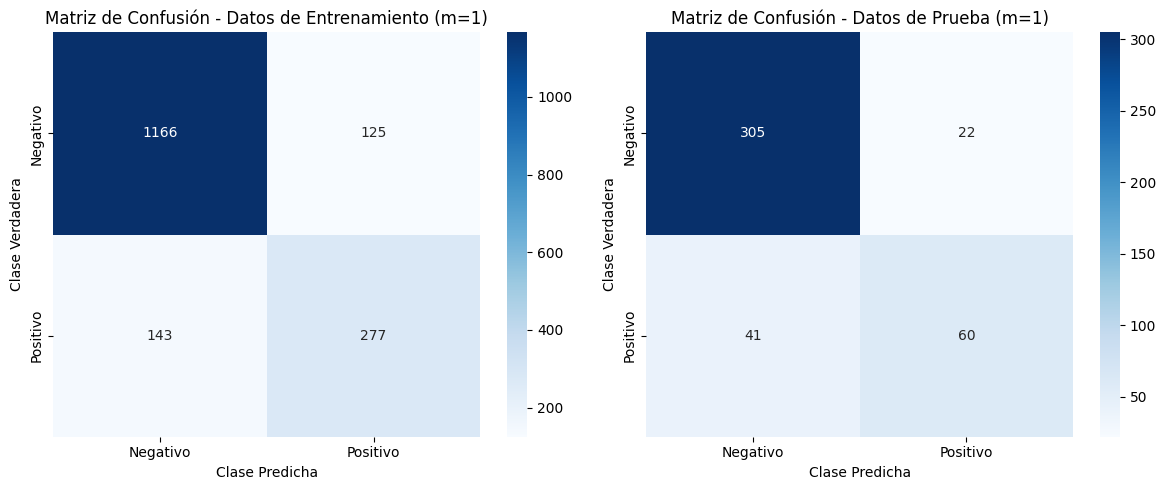

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Datos de la matriz de confusión para entrenamiento
confusion_matrix_train = [[1166, 125], [143, 277]]

# Datos de la matriz de confusión para prueba
confusion_matrix_test = [[305, 22], [41, 60]]

# Crear un gráfico con dos subgráficos
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de la matriz de confusión - Datos de Entrenamiento
sns.heatmap(confusion_matrix_train, annot=True, fmt="d", cmap="Blues", xticklabels=["Negativo", "Positivo"], yticklabels=["Negativo", "Positivo"], ax=ax[0])
ax[0].set_title("Matriz de Confusión - Datos de Entrenamiento (m=1)")
ax[0].set_xlabel("Clase Predicha")
ax[0].set_ylabel("Clase Verdadera")

# Gráfico de la matriz de confusión - Datos de Prueba
sns.heatmap(confusion_matrix_test, annot=True, fmt="d", cmap="Blues", xticklabels=["Negativo", "Positivo"], yticklabels=["Negativo", "Positivo"], ax=ax[1])
ax[1].set_title("Matriz de Confusión - Datos de Prueba (m=1)")
ax[1].set_xlabel("Clase Predicha")
ax[1].set_ylabel("Clase Verdadera")

# Ajustar el espacio entre los gráficos
plt.tight_layout()
plt.show()



Como se puede observar en la tabla 1, la precisión y desviación estándar de los modelos con preprocesamiento similar a max_range_split = 2 y 3 dieron como resultado exactamente los mismos valores. Esto se debe a que al preprocesar los valores, los mejores puntos de corte encontrados utilizando todo el conjunto de datos dieron como resultado los mismos puntos, y en ambos casos se determinó que un solo punto de corte que divide en dos rangos los atributos era lo que generaba más ganancia.

Se aclara también que en la tabla 2 no se visualizan la precisión y desviación estándar de las pruebas sobre datos de entrenamiento ya que en todos los casos el resultado fue de precisión = 100% y desviación estándar = 0. 

## 4. Conclusión

En este laboratorio, hemos implementado y evaluado un árbol de decisión basado en el algoritmo ID3, extendido para soportar atributos numéricos mediante el hiperparámetro max_range_split. También hemos comparado los resultados obtenidos con otros modelos de árboles de decisión proporcionados por scikit-learn, como DecisionTreeClassifier y RandomForestClassifier.

### 4.1 Mejores Resultados:
Los mejores resultados en términos de precisión se obtuvieron con el modelo RandomForestClassifier, particularmente utilizando el criterio entropy y log_loss, alcanzando una precisión promedio cercana al 89.20% y con una desviación estándar relativamente baja, lo que indica una buena estabilidad del modelo. 

En contraste, el algoritmo ID3 implementado obtuvo su mejor precisión promedio de 84.38% cuando se utilizó max_range_split igual a 3, aunque con una desviación estándar un poco más alta que las de los modelos de RandomForestClassifier, lo cual sugiere una mayor variabilidad en el desempeño del modelo ID3.

### 4.2 Relaciones Observadas:
Al analizar los resultados, se observó que el valor del hiperparámetro max_range_split influyó en la precisión del algoritmo ID3, aunque la mejora entre max_range_split = 2 y max_range_split = 3 fue marginal. Esto sugiere que, para este conjunto de datos específico, un mayor número de puntos de corte en los atributos numéricos no necesariamente lleva a una mejora significativa en el rendimiento. Esto puede deberse, como vimos a la hora de preprocesar los valores numéricos, a que muchas veces la mayor ganancia de un conjunto de puntos de corte sigue siendo un punto individual que divida en dos rangos al conjunto, que dos puntos de corte que dividan el rango en tres. 

Por otro lado, al analizar los resultados de la implementacion ID3 tanto preprocesando los datos como no preprocesandolos, vimos que el modelo da mejores resultados cuando no se preprocesan los atributos numéricos como categóricos. Esto tiene sentido, ya que el algoritmo permite que se encuentren los mejores puntos de corte en cada rama del árbol, y que también se pueda reutilizar un atributo numérico con distintos puntos de corte a lo largo del árbol. Esto se pierde al preprocesar los datos, ya que estamos dandoles un valor categórico y este no varía luego dinámicamente en el modelo. 

Otra cosa a destacar es que al preprocesar los datos fue el único caso en el que las pruebas con datos de entrenamiento no dieron como resultado una precisión de 100% y una desviación estándar de 0, sino que los valores de precisión fueron de 98.04% y desviación de 0.14, lo que sugiere que al preprocesar los datos y categorizar los atributos numéricos previo a ingresar al algoritmo, estamos perdiendo información que luego genera esa disminución en la precisión.  

También pudimos observar como varían los resultados de los algoritmos de scikit-learn al variar el criterio utilizado, para DecisionTreeClassifier vemos como el criterio 'gini' es el que obtiene la mayor precisión, mientras que en RandomForestClassifier esto sucede al revés (aunque la diferencia es marginal).

En el caso de DecisionTreeClassifier, las diferencias entre gini y entropy pueden ser más pronunciadas porque cada división depende fuertemente del criterio seleccionado. gini puede ser más efectivo en conjuntos de datos donde una clase es claramente dominante, mientras que entropy puede ser mejor en conjuntos de datos más balanceados o complejos.

En RandomForestClassifier, las diferencias entre los criterios tienden a disminuir. El efecto de un solo árbol que utiliza un criterio específico se diluye en el conjunto. Esto explica por qué, en nuestras observaciones, aunque hay una diferencia entre los criterios, es marginal. 

En conclusión, pudimos ver que el algoritmo implementado, si bien no obtuvo tanta precisión como el RandomForestClassifier, se encuentra similar al DecisionTreeClassifier, lo cual tiene sentido ya que teóricamente son el mismo algoritmo, y RandomForestClassifier es un algoritmo más potente. 


### 4.3 Posibles Mejoras:
Para mejorar los resultados, podrían considerarse las siguientes acciones:

Optimización del hiperparámetro max_range_split: Aunque solo se evaluaron los valores 2 y 3, podría ser útil explorar otros valores de max_range_split. Para esto sería necesario rever la implementación del algoritmo ya que actualmente, como se mencionó anteriormente, solamente soporta valores de 2 y 3.

Implementación de nuevos hiperparámetros: Además de max_range_split, si se quisiera mejorar la precisión del modelo, se podría probar implementar otros hiperparámetros, como los que tienen los modelos vistos de scikit-learn, para ver si éstos mejoran el desempeño.

Ajuste de modelos con scikit-learn: Se podrían ajustar más hiperparámetros en los modelos de scikit-learn, como el número de árboles en RandomForestClassifier o la profundidad máxima en DecisionTreeClassifier, para maximizar la precisión y minimizar la desviación estándar.

Incorporación de otros métodos de validación: Aunque ya se utilizó validación cruzada en este laboratorio, implementar técnicas de validación más exhaustivas, como la búsqueda de hiperparámetros con validación cruzada en cada iteración, podría optimizar aún más los resultados.

### 4.4 Conclusión General:
El trabajo realizado permitió una comprensión profunda de cómo los distintos modelos de árboles de decisión pueden ser aplicados y ajustados a un conjunto de datos real. 

Por un lado, el haber implementado el algoritmo ID3 y haber conseguido un desempeño aceptable, nos permitió ver cómo funcionan estos modelos por detrás y nos hizo tener en cuenta los posibles casos borde y consideraciones que se puede tener a la hora de trabajar con conjuntos de datos.

Por otro lado, aunque el algoritmo ID3 implementado mostró un buen desempeño, los modelos más avanzados de scikit-learn demostraron ser más robustos y precisos en este contexto, lo que remarca la importancia de considerar técnicas más complejas en problemas de clasificación cuando se dispone de datos suficientemente grandes y variados y se quiere tener la mayor precisión posible.